# **📓 CHAPTER 4: 분류**

### **📖 01.분류의 개요**

✅분류: 지도학습의 대표적인 유형
- 나이브 베이즈, 로지스틱 회귀, 결정 트리, 서포트 벡터 머신, 최소근접 알고리즘, 신경망, 앙상블

✅앙상블: 서로 다른/같은 알고리즘을 결합. 정형 데이터에 대해 높은 예측 성능 가짐. 배깅(랜덤 포레스트)/부스팅(스래디언트 부스팅) 방식으로 나뉨.

✅결정 트리: 앙상블의 기본 알고리즘. 사전 가공의 영향이 적음. 약한 학습기(앙상블에 애용)


### **📖 02. 결정 트리**

데이터의 규칙을 학습을 통해 찾아내고 트리 기반의 분류규칙을 만드는 것. 규칙은 알고리즘 성능을 좌우함.

- 규칙노드(규칙조건-피처들의 결합) / 리프노드(결정된 클래스값) / 서브트리
- 규칙이 많을수록 분류가 복잡해지므로 과적합으로 이어짐. 최대한 균일하게 분할하여 적은 노드로 많은 데이터를 분류해야 높은 예측 정확도 가짐
- 균일도: 데이터 구분하는데 필요한 정보의 양에 영향
   - 정보 균일도가 높은 데이터 세트부터 선택 > 서브 데이터 세트 생성 > 균일도 높은 자식 데이터로 자식 트리 생성
   - 측정방법: 정보이득지수(1-엔트로피 지수) 높을수록, 지니계수(0:평등~1:불평등) 낮을수록 균일도 높음
   - DecisionTreeClassifier(): 결정트리 알고리즘, 지니계수를 기본으로 데이터 분할

(1) 결정 트리 모델의 특징
- 균일도를 기반으로 쉽고 직관적임, 대체로 전처리가 필요없음( 사전 가공 영향 적음)
- 단점: 과적합으로 정확도가 떨어질 우려, 유연대처 X ->> 트리의 크기를 제한하는 튜닝 필요

(2) 결정 트리 파라미터

- DecisionTreeClassifier: 분류 클래스의 결정트리
- DecisionTreeRegressor: 회귀 클래스의 결정트리

✨
파라미터       
```
- min_samples_split: 노드 분할 위한 최소 샘플 데이터 수(시작노드), 작을수록 과적합
- min_samples_leaf: 분할 브랜치 노드에서 가져야할 최소한의 샘플 데이터 수, 작을수록 과적합, 비대칭 데이터에서는 작게 설정 필요
- max_features: 고려할 최대 피처 개수, int/float, sqrt(auto)/log/None(전체 피처)
- max_depth:트리의 최대 깊이. None디폴트, 클수록 과적합
- max_leaf_nodes: 말단 노드의 최대 개수
```


(3) 결정 트리 모델 시각화

Graphviz 패키지 사용    
- export_graphviz()
- 코드는 필사 참고
- 트리의 브랜치 노드와 말단 리프의 구성 한눈에 볼 수 있음
- 리프 노드: 자식노드가 없는 마지막 노드. 하나의 클래스 값으로 최종 데이터 구성 혹은 하이퍼 파라미터 조건을 충족
- 브랜치 노드: 자식노드 있는 노드. 분할 규칙 조건을 가짐

```
- petal length<=2 : 자식노드 만들기 위한 피처의 규칙 조건. 없으면 리프 노드
- samples: 현 규칙에 해당하는 데이터 건수
- gini: value=[]에서의 지니 계수
- value=[]: 클래스 값 별 데이터 건수
- class=~ : 하위 노드에서 ~의 개수가 제일 많음
```
- 각 노드의 색은 에리블 값을 의미. 색이 짙을수록 지니 계수가 낮고 해당 레이블의 데이터가 많다는 뜻임
- 과적합 막기 위한 하이퍼 파라미터 필요

- feature_importance_=[0.01,0.02,0.03,0.9]: , 피처 지표별 중요도 할당됨, 값이 높을수록 중요도가 높음.

(4) 결정 트리 과적합
- make_classification(): 분류를 위한 데스트용 데이터 생성, 피처 데이터 세트/클래스 레이블 데이터 세트 반환
- 디폴트 파라미터로는 이상치 데이터 분류를 위해 분할이 자주 일어남. 하이퍼 파라미터 조정을 통해 결정기준 경계 완화
- 트리 생성 조건 제약으로 테스트 세트 분류 정확도 높임(일반화)

(5) 결정 트리 실습

- 중복 피처명은 변경하게 데이터프레임으로 로드 필요
- 피처 타입 확인후 필요시 카테고리 인코딩
- value_counts()로 레이블 분포도 확인
- .grt_params(): 기본 파라미터 확인
- GridSearchCV()로 파라미터 조절
  - best_params_로 최적 파라미터 확인
  - scoring='accuracy' 정확도로 성능 확인
- features_importances_로 각 피처의 중요도 확인 가능, 높은 중요도 가진 피처들이 규칙 생성에 영향을 줌

### **📖 03. 앙상블 학습**

(1) 앙상블 학습 개요
- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 더 정확한 예측을 도출하는 기법
- 정형 데이터 분류에서 뛰어난 성능( 비정형은 딥러닝), 회귀 분야에서도 예측 성능 좋음
- **대표 알고리즘**: 랜덤 포레스트, 그래디언트 부스트, XGBoost, LightGBM(빠른 수행 속도), 스태킹(메타 모델)
- **유형**: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 그외(스태깅)
   - 보팅✅ :  서로 다른 분류기 결합- 다른 ML알고리즘
   - 배깅✅ :  같은 유형의 알고리즘 기반 분류기 결합, 데이터 샘플링을 다르게 하면서 학습- *부트 스트래핑 분할(원본 데이터 샘플링), 각 데이터 세트의 중첩 허용. // 📌_랜덤 포레스트_
   - 보팅, 배깅 둘다 여러 분류기의 투표(보팅)로 최종 예측 결정.
   - 부스팅✅ :  여러 분류기 순차 학습, 앞의 분류기가 예측 틀린 데이터 대해 다음 분류기에는 가중치 부여(부스팅)해 학습, 예측 진행. 앙상블학습 주도. // 📌_그래디언트 부스트, XGBoost, LightGBM_
   - 스태킹✅: 여러 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델로 재학습, 예측


(2) 보팅 유형- 하드 보팅, 소프트 보팅
- 하드 보팅: 다수의 분류기가 결정한 예측값을 최종 예측 결괏값으로 선정.
- 소프트 보팅: 레이블 값 결정 확률을 평균내서 확률이 가장 높은 레이블 값으로 선정. 일반적 보팅 방식.

(3) 보팅 분류기
- 사이킷런의 VotingClassifier
- 위스콘신 유방암 데이터 세트: load_breast_cancer, 종양 악성여부 결정하는 이진 분류 데이터 세트
-📂 VotingClassifier( estimators =[(),()], voting = 'soft/hard')
    - estimators: 여러 분류기 객체들을 튜플로 입력, 여러개는 리스트로 묶음
    - voting: 소프트, 하드(디폴트) 방식
```
vo_clf(=보팅 객체).fit(X_train, y_train)
vo_clf.predict(X_test)
```

- 보팅이 무조건 예측 성능이 더 좋아지는 것은 아니나 전반적으론 단일 ML보다 성능이 좋음. 현실엔 다양한 변수가 있기 때문에 다양한 관점의 알고리즘 결합이 더 나은 성능을 이끈다.

- 같은 알고리즘 기반인 배깅과 부스팅은 대부분 결정트리 알고리즘 기반. 과적합의 단점이 앙상블 학습에서의 많은 분류기 결합으로 보완되어 편향-분산 트레이드오프 효과 극대화됨.

### **📖 04. 랜덤 포레스트**

(1) 📌 랜덤 포레스트의 개요 및 실습

- 배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정. 대표적으로 랜덤 포레스트 알고리즘 사용
- 랜덤 포레스트✅: 기반은 결정트리 알고리즘. 여러개의 결정트리 분류기가 전체 데이터에서 배깅으로 각자 샘플링 학습, 최종적으로 모든 분류기가 보팅으로 예측 결정함
- 부트스트래핑✅: 여러 데이터 세트를 중첩되게 분리.서브세트의 데이터 건수는 전체 데이터 건수와 동일함.n_estimator로 서브세트 개수 지정가능.
- 📂 RandomForestClassifier(): 다양한 하이터 파라미터 튜닝 가능

(2) 랜덤 포레스트 하이퍼 파라미터 튜닝
- 트리 기반 자체의 하이퍼 파라미터가 많음 + 배깅, 부스팅, 학습, 정규화 위한 파라미터
- 주요 파라미터📋:
```
  - n_estimators : 결정 트리 개수, 대체로 많을수록 성능 향상, 수행시간 증가
  - max_features: 트리 분할 위한 참조 피처 (디폴트: 'auto', 'sqrt')
  - max_depth
  - min_samples_leaf
  - min_samples_split
 * RandomForestClassifier(n_estimators=100, min_samples_leaf = 6, max_depth=16, min_samples_split=2, random_state=0)
```

- GridSearchCV로 파라미터 튜닝
  - n_jobs = -1: 모든 CPU 코어 이용해 학습
  - 파라미터들을 딕셔너리로 묶어 params 저장, params_grid = params로 한번에 수행


- rf_clf.fit/predict()
- rf_clf.feature_importances_:  알고리즘이 선택한 피처의 중요도


### **📖 05. GBM(Graident Boosting Machine)**

(1) 📌 GBM 개요 및 실습
- 부스팅: 여러 약한 학습기의 순차적 학습-예측, 잘못 예측한 데이터에 가중치 부여해 오류 개선하며 학습.
- 에이다 부스트(AdaBoost)✅:
   - 1. 첫번째 약한 학습기가 기준1로 분류
   - 2. 오류 데이터에 대해 가중치(0.3) 값 부여, 크기 커짐
   - 3. 두번째 약한 학습기가 기준2로 분류
   - 4. 오류 데이터에 대해 가중치(0.5) 부여
   - 5. 세번째 약한 학습기...
   - 6. 순차적으로 오류 값에 대해 가중치(점점 증가) 부여 후 예측결정기준을 모두 결합해 최종 예측 수행

- 그래디언트 부스트(GBMBoost)✅:
   - 위와 유사, 가중치 업데이트를 경사하강법(Gradient Descent)이용하는 차이.
   - 경사하강법: 오류값(h(x)) = 실제값(y) - 예측값(F(x))를 최소화하는 방향성으로 가중치 값 업데이트
   - 📂 GradientBoostingClassifier()
   - time.time(): 현재 시간
- 일반적으로 랜덤포레스트보다 예측 성능이 뛰어남. 수행 시간이 많이 오래 걸리는 단점(병렬처리X).

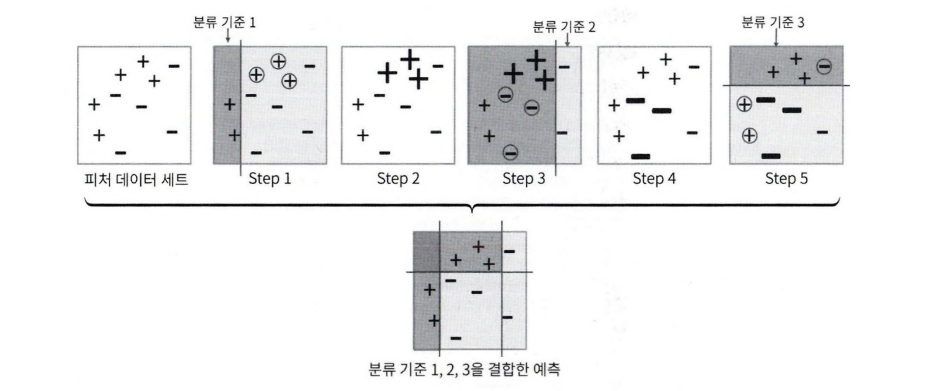

(2) GBM 하이퍼 파라미터 소개

- 트리 기반 파라미터: n_estimators, max_depth, max_features

- GBM 파라미터📋:
```
 - loss: 경사하강법에서 사용할 비용 함수
 - learning_rate: 매 학습마다 적용하는 학습률. 약한 학습기가 순차적으로 오류 값 보정할 때 적용하는 계수. n_estimator와 상호보완적으로 조합
 - n_estimators: 약한 학습기 개수. 많을수록 성능 좋아지나 시간 오래걸림(기본:100)
 - subsample: 약한 학습기가 학습에 사용하는 데이터 샘플링 비율(기본:1), 과적합 염려될 때 1보다 작게 설정
```

- GridSearchCV로 튜닝 가능하나 수행시간이 많이 오래 걸림
- 과적합에도 뛰어난 예측 성능을 가짐.
- GBM 기반 ML 패키지: XGBoost, LightGBM



### **📖 06. XGBoost(eXtra Gradient Boost)**

(1) 📌 XGBoost 개요
- 트리기반의 앙상블 학습 알고리즘 중 각광받고 있음
> 장점:
   - 분류, 회귀에서 뛰어난 예측 성능
   - GBM 기반이지만 느린 수행시간과 과적합 규제부제 등의 문제 해결함 ( 병렬 학습 가능, 자체 과적합 규제)
   - Tree pruning(나무 가지치기): 긍정 이득 없는 분할을 가지치기해 분할 수를 줄임
   - 자체 내장 교차 검증: 반복 수행 횟수 최적화, 평가 값이 최적화 되면 반복 중단(조기 중단 기능)
   - 결손값 자체 처리

- 핵심 라이브러리는 C,C++로 작성되어 있으나 파이썬 패키지 제공. "xgboost" -> 파이썬 래퍼 XGBoost(네이티브)
- 사이킷런 연동 XGBClassifier, XGBRegressor ->사이킷런 래퍼 XGBoost 모듈

(2) XGBoost 설치하기
아나콘다 Command 창에서 설치

(3) 파이썬 래퍼 XGBoost 하이퍼 파라미터
- GBM과 유사한 하이퍼 파라미터 가짐 + 조기중단, 과적합 규제 위한 파라미터 추가
- 파이썬 래퍼 XGBoost 파라미터📋:

```
 - 주요 일반 파라미터: booster, silent, nthread 디폴트 값을 잘 바꾸지 않음

 - 부스터 파라미터:
    - eta(업데이트 되는 학습률) -> 사이킷헌 래퍼 클래스는 learning_rate
    - num_boost_rounds(학습 분류기 개수)
    - min_child_weight(트리 추가 분할 위한 weight 총합, *과적합 조절)
    - gamma(리프 노드 추가 분할 결정하는 최소 손실 감소 값, *과적합 조절)
    - max_depth(깊이 제한)
    - sub_sample(데이터 샘플링 비율, *과적합 조절)
    - colsample_bytree(트리 생성에 필요한 피처(칼럼) 임의 샘플링. *과적합 조정)
    - lambda(L2 Regularization 적용 값, *과적합 감소)
    - alpha(L1 Regularization 적용 값. *과적합 감소)
    - scale_pos_weight(특정 값으로 치우친 비대칭 클래스의 데이터 셋의 균형 유지 위함)

 - 학습 태스크 파라미터:
    - objective(최솟값 가져야 할 손실 함수 정의)
    - binarv:logistic: 이진 분류 시 적용
    - multi:softmax : 다중 분류 시 적용
    - multi:softprob : 개별 레이블 클래스에 해당되는 예측 확률 반환
    - eval_metric: 검증에 사용되는 함수 정의(회귀 rmse, 분류 error)

```

- 과적합 해결: eta값 낮추기(num_round 높이기), max_deapth 값 낮추기, min_child_weight 값 높이기, gamma 값 높이기, subsample, colsample_bytree 조정

- 자체적 교차검증, 성능 평가, 시각화(피처 중요도)기능
- 조기 중단 기능(num_rounds): n_estimators 지정 횟수 도달 전, 예측 오류가 N번 반복하는 동안 감소하지 않으면(개선되지 않으면) 더 이상 부스팅을 진행하지 않고 중지. 수행 시간 개선됨

(4) 파이썬 래퍼 XGBoost 적용- 위스콘신 유방암 예측

- 일반적으로 빠른 수행 처리 가능하지만, 개인용 PC는 CPU코어가 많지 않으므로 어려울수 있음.
- 종양의 악성/양성 여부 분류 데이터 세트 -> XGBoost 기반 예측
- 학습/테스트 데이터 분할 -> 학습용을 최종 학습용/검증용으로 분할(조기 중간 성능 평가 위함)
  - 조기 중단 성능 평가: 검증 데이터 세트 이용. train( early_stopping_rounds=50)
  - 평가용 데이터 세트지정 필요, eval_metric의 지정된 평가 지표로 평가용 데이터에서 예측 오류 측정.
- 파이썬 래퍼 XGBoost는 전용 데이터 객체인 DMatrix 사용( data: 피처 데이터 세트, label: 레이블/종속값 데이터 세트)
- 하이퍼 파라미터는 딕셔너리 형태로 한번에 설정
- predict 는 사이킷런에선 예측 결과 클래스 값(0,1)이었지만 xgboost에서는 예측 결과 추정 확률 값 반환. 즉, 이진분류에서는 0.5보다 크면 1
- plot_importance(): 피처 중요도 시각화, 기본 F스코어 기반으로 해당 피처의 중요도 나타냄.
   - (f스코어: 트리 분할 시 피처가 얼마나 자주 사용되었는지를 지표로 나타낸 값)
   - 피처가 넘파이일 땐 Y축의 피처명을 f0,f1,,,로 나타냄.


- to_graphiz(): 트리 기반 규칙 구조
- cv(): 자체 교차검증 수행 후 최적 파라미터 구함
    - params, dtrain, num_boost_round, nfold, stratified(bool), metrics, early_stopping_rounds
    - 데이터프레임으로 반환

(5) 사이킷런 XGBoost 개요 및 적용

- fit(), predict()로 학습/예측 가능, GridSearchCV, Pipeline 사용 가능
- 분류: XGBClassifier, 회귀: XGBRegressor
- 파라미터 변경📋:
```
 - eta -> learning_rate
 - sub_sample -> subsample
 - lambda -> reg_lambda
 - alpha -> reg_alpha
 - num_boost_round == n_estimator(적용)
```

- 조기 중단값을 급격하게 줄이면 예측 성능 저하 우려있음. 적당한 반복횟수로 지정 필요함.

### 📖 **07. LightGBM**

 XGBoost는 학습시간이 오래 걸리고 GridSearchCV로 하이퍼 파라미터 튜닝을 하면 수행시간이 오래 걸림. GBM은 더 걸림

- 📌 LightGBM:
    - 장점: 더 빠른 학습시간과 예측시간. 메모리 사용량도 적음. 예측 성능 그대로(XGBoost 장점 계승 단점 보완), 카테고리형 피처의 자동 변환과 최적 분할, 대용량 데이터에 대한 병렬 컴퓨팅 기능.
    - 단점: 적은 데이터 세트(10,000건 이하) 적용 시 과적합 가능성 큼

- 트리분할:
   - 균형 트리 분할(대부분 트리 기반 알고리즘): 트리 깊이 최소화, 균형 잡혀 오버피팅에 강함, 시간 오래 걸림
   - 리프 중심 트리 분할(LightGBM)✅: 비대칭 구조, 최대손실값의 리프 노드 지속 분할. 예측 오류 손실 최소화, 시간빠름. 과적합 단점

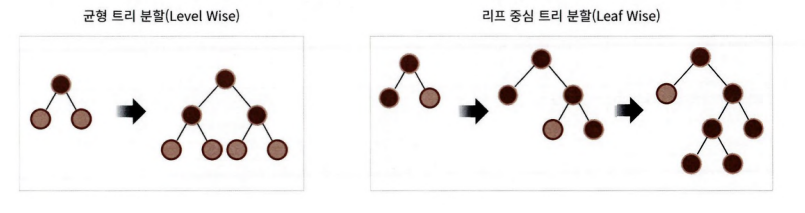

- 사이킷런 래퍼 클래스 제공. 📂lightgbm(LBGMClassifier, LGBMRegressor)


(1) **LightGBM 하이퍼 파라미터**

 트리 깊이가 깊어지므로 제한 파라미터 설정 필요함
- 주요 파라미터📋:

```
- num_iterations: 반복 수행하는 트리 개수 지정. 클수록 예측 성능 높아지나 과적합. 사이킷런에선 n_estimators
- learning_rate: 0-1 업데이트 되는 학습률 값
- max_depth: 깊이 제한
- min_data_in_leaf: 리프 노드 되기 위해 최소한으로 필요한 레코드 수. 과적합 제한. min_child_samples
- num_leaves: 개별 트리의 최대 리프 개수
- boosting: 부스팅의 트리 생성 알고리즘(gbdt/rf)
- bagging_fraction: 데이터 샘플링 비율. 사이킷런에선 subsample
- feature_fraction: 개별 트리 학습 시 무작위로 선택하는 피처의 비율
- lambda_l2: L2 규제 제어, 클수록 과적합 감소. reg_lambda
- lambda_l1: L1 규제 제어, reg_alpha
```
- learning Task 파라미터📋:

```
- objective: 최솟값 가져야할 손실함수
```

(2) 하이퍼 파라미터 튜닝 방안

기본방안🔅:
- num_leaves(클수록 정확도/복잡도/과적합 커짐) 중심으로 min_child_samples, max_depth 조정
- learning_rate 작게, n_estimators 적당히 크게

(3) 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

- 사이킷런 래퍼 LightGBM, XGboost는 많은 하이퍼 파라미터가 같음

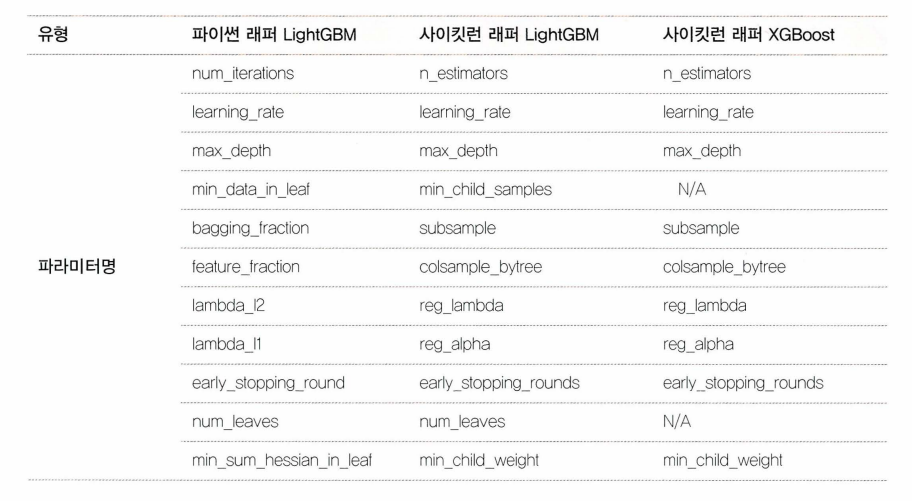


(4) LightGBM 적용 - 위스콘신 유방암 예측

- 조기중단 기능
    - .fit(early_stopping_rounds): 3.3.2버전

- 피처 중요도 시각화 내장 API: plot_importance()

### 📖 **08. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝**

- 사이킷런 GridSearch 방식: XGBoost/LightGBM은 많은 시간 소모됨.
- 베이지안 최적화 기법: 대용량 학습 데이터, XGBoost, LightGBM 튜닝에 사용

(1) 베이지안 최적화 개요
- 베이지안 최적화✅: 베이지안 확률에 기반을 둔 최적화 기법. 새로운 데이터를 입력 받았을 때 최적 함수를 예측하는 사후 모델 개선하며 만든다.
- 대체모델: 획득 함수로부터 최적 함수 예측할 수 있는 입력값 추천 받아 점차적 모델 개선
- 획득함수: 개선된 대체 모델로 최적 입력값 계산(대체모델의 하이터 파라미터)

- 단계: 3-4 반복하면 대페 모델의 불확실설 개선, 정확한 최적 함수 추정 가능

    - step1: 랜덤하게 파라미터 샘플링, 결과 관측
    - step2: 관측값 기반으로 대체 모델은 최적 함수를 추정, y축의 가장 높은 value 가질 때의 하이퍼 파라미터가 최적 관측값
    - step3: 추정 최적 함수 기반으로 획득함수는 다음으로 관측할 하이퍼파라미터 계산. 이전 최적 관측값보다 더 큰 최댓값 가지는 지점으로 전달.
    - step4: 획득함수로부터 받은 하이퍼 파라미터로 수행, 관측값 기반으로 대체 모델 갱신, 다시 최적 함수 예측 추정

- 최적함수 추정 알고리즘: 가우시안 프로세스, 트리 파르젠 Estimator(HyperOpt에서 사용)

(2) HyperOpt 사용하기

- 베이지안 최적화를 튜닝에 적용하기 위한 파이썬 패키지📋: HyperOpt, Bayesian Optimization, Optuna

- 순서:

1. 입력 변수 명, 입력값의 검색 공간 설정: 딕셔너리 형태로 입력 {변수: 검색 공간}
   - 검색 공간 제공 함수: hp.quniform(), hp.uniform(), hp.randint(), hp.loguniform(), hp.choice()

2. 목적 함수 생성: 위의 딕셔너리를 인자로 받고, 특정 값 반환하는 구조. 딕셔너리로 반환시 {'loss': -, 'status':-}

3. 검색 공간에서 목적 함수의 반환 **최솟값**을 가지는 최적의 입력값 유추:

  - 베이지안 최적화 기법 기반, fmin(fn=목적함수, space=검색공간 딕셔너리, algo=적용 알고리즘, max_evals=입력값 시도 횟수, trials)
    
  - Trials(): result(반복 수행마다 반환되는 반환값), vals(반복 수행마다 입력되는 입력변수값) -> 최적화 결과 정보 제공

(3) HyperOpt 이용한 XGBoost, 하이퍼 파라미터 최적화

- 목적함수에서 XGBoost 학습 후 예측 성능 결과를 반환값으로 설정

- 주의사항❗:
   1. 정수형(hp.quniform())/실수형(hp.uniform()) 파라미터 구분 => XGBoostClassifier의 파라미터는 정수형만 가능하므로 int형변환 필요

   2. 목적함수는 최솟값으로 최적화하므로 값이 클수록 좋은 성능지표(정확도)의 경우 *-1* 곱한 뒤 반환 => 더 큰 성능 지표가 더 작은 반환값이 되도록 함.

- fmin()으로 최적 하이터 파라미터를 도출, XGBClassifier로 재학습 후 성능 확인하면 좋아진 성능 확인 가능


### **📖 09. 분류 실습 - 캐글 산탄데르 고객 만족 예측**

- 대부분이 만족이고 불만족은 4%인 비대칭 데이터 세트

(1) XGBoost 모델 학습, 튜닝
- 성능 평가: ROC-AUC -> 📋 XGBClassifier() 객체 생성 시 eval_metric = 'auc'로 설정
- HyperOpt 이용해 베이지안 최적화 기반으로 하이퍼 파라미터 튜닝
   - 3 Fold 교차검증으로  -1*ROC=AUC값(최대값이 최소 반환값이 되도록) 반환
   - fmin()함수로 최적의 파라미터 도출: 📋
      
      ```
      max_eval 지정 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
      best = fmin(fn=,space=,algo=,max_evals=,trials=)
      ```
   - 도출된 최적 파라미터를 기반으로 XGBClassifier 재학습, 테스트 데이터에서 ROC AUC 재측정->개선됨
  
- XGBoost는 GBM 기반이므로 수행시간이 오래 걸리는 단점.
- 과적합에 기본적으로 뛰어난 앙상블 계열 알고리즘이므로 하이퍼 파라미터 튜닝으로 성능 수치가 급격히 개선되지는 않음

(2)LightGBM 모델 학습, 튜닝

- XGBoost보다는 시간 더 단축
- HyperOpt(fmin, tpe, Trials)로 하이퍼 파라미터 튜닝
- 재학습, ROC-AUC 재평가: 위와 같이 개선됨

### 📖 **10. 분류 실습 - 캐글 신용카드 사기 검출**

- 이런 사기 검출, 이상 검출 데이터 세트는 레이블 값이 극도로 비중 적기 때문에 불균형한 분포를 가지는 경우 많음

(1) 언더 샘플링과 오버 샘플링

레이블이 불균형한 분포일 때 학습에 예측 성능 문제가 생길 수 있음. 이상 레이블 데이터 건수가 매우 적어서 일방적으로 정상 레이블로 치우친 학습을 하므로 이상 데이터 검출이 어려움
  - 지도학습에서 적절한 학습 데이터 확보가 필요함 -> 오버 샘플링, 언더 샘플링 이용
  - 언더 샘플링✅: 많은 데이터 > 적은 데이터 수준으로 감소
    - 정상 레이블 데이터를 이상 레이블 데이터 수준으로 줄임. 너무 많이 감소시키면 제대로 학습 안되므로 유의
  - 오버 샘플링✅: 적은 데이터 > 많은 데이터로 증식해 충분한 데이터 확보
    - 단순 증식은 과적합 될수 있으므로 원본을 변경해서 증식(SMOTE: K최근접 이웃 찾아 이웃들의 차이를 일정 값으로 만들어 새로운 데이터 생성하는 방식)
    - SMOTE 구현 패키지: imbalanced-learn📋


(2) 데이터 일차 가공 및 모델 학습/예측/평가

- 불필요한 피처 삭제
- 📋 train_test_split(): stratify=y_target으로 Stratified 방식으로 추출해 학습/테스트 레이블 값 분포도 동일하게 함.
- 극도로 불균형한 레이블 값 분포를 가지므로 LGBMClassifier객체에 boost_from_average=False 설정
- 로지스틱보다 LGBM에서 더 높은 평가 성능을 보임.

(3) 데이터 분포도 변환 후 모델 학습/예측/평가

- 로지스틱 회귀는 선형 모델이므로 주요 피처들의 값을 정규 분포 형태로 유지하는 것을 선호,
- 중요 피처에 대해 정규 분포 형태로 변환
     - 📋 scaler = StandardScaler()
     - 📋 scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))

     - 로지스틱 회귀는 오히려 정밀도, 재현율 저하. / LGBM은 큰 성능상의 변경 없음

- 로그 변환: 데이터 분포의 왜곡을 상당 수준 개선해줌
     - 📋 np.log1p(df_copy['Amount'])
     - 넘파이의 log1p()이용
     - 로지스틱 회귀는 정밀도 향상, 재현율 저하 / LGBM은 재현율 향상

- 레이블이 불균일 할 땐 로지스틱 회귀는 데이터 변환 시 불안정한 성능을 보임

(4) 이상치 데이터 제거 후 모델 학습/예측/평가

- 이상치 데이터 찾아내기: IQR방식
     - 사분위 값의 편차를 이용. IQR(=Q3-Q1)*1.5 범위를 이용해 최댓값 초과 혹은 최솟값 미달 데이터를 이상치로 간주.
     - 박스플롯이 이를 시각화한 것.
     - 📋 quantile_25 = np.percentile(values, 25)

- 레이블과 가장 상관성이 높은 피처 위주로 이상치 검출(heatmap이용)

- 이상치를 찾은 후 제거:
  - 📋 df_copy.drop(outlier_index, axis=0, inplace=True)
- 로지스틱 회귀와 LGBM 모두 예측 성능 크게 향상됨

(5) SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

- 📋 imbalanced-learn 패키지의 SMOTE() 클래스
- 반드시 학습 데이터 세트만 오버 샘플링 해야함! (검증 데이터나 테스트 데이터 세트 오버 샘플링X)❗
- 📋 smote.fit_resample(X_train, y_train)
- 로지스틱 회귀: 재현율 크게 증가, 정밀도 크게 저하(실제 데이터를 지나치게 1로 예측해버림)
- LGBM: 재현율은 증가, 정밀도 저하

- SMOTE 적용시 재현율 증가/정밀도 저하는 일반적이므로 재현율 지표를 높이는 게 주요 목표인 경우 사용함.

- 정리:

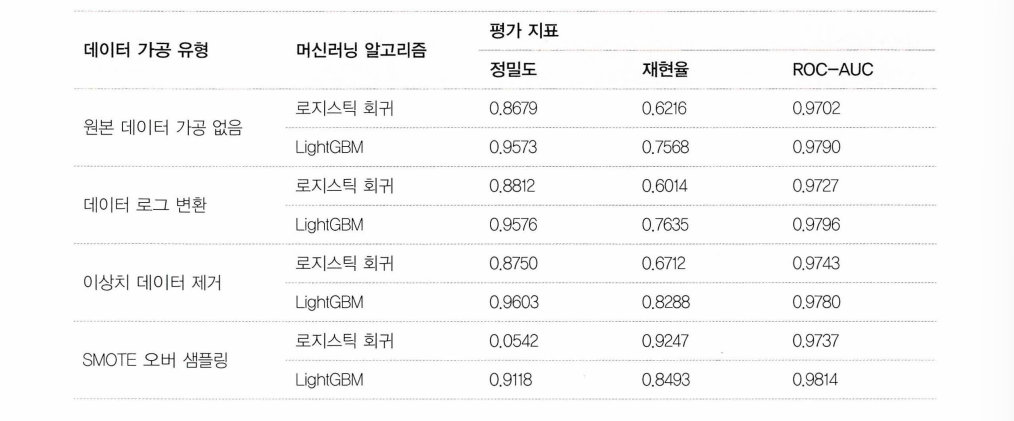

### 📖 **11. 스태킹 앙상블**

개별 알고리즘으로 예측한 데이터를 기반으로 최종적 메타 데이터 세트를 만들어 별도 ML알고리즘으로 다시 최종 학습/예측 수행.

 - 메타모델: 개별 모델의 예측된 데이터를 기반으로 다시 학습/예측하는 방식
 - 개별적인 기반 모델 / 최종 메타 모델 두 종류의 모델이 필요
 - 성능이 비슷한 모델 결합해 좀 더 나은 성능 향상 도출할 때 적용
 - 개별 모델로 학습된 예측 레이블을 스태킹 해서 새로운 데이터 세트를 만드는 방식.

 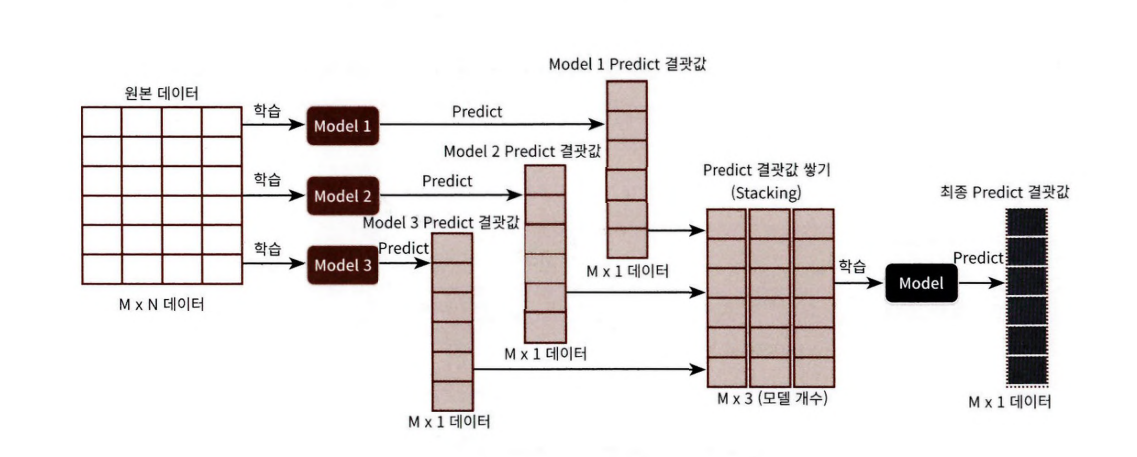

(1) 개별 스태킹 모델

-  1. 개별 ML 모델 객체들 생성, 스태킹으로 만들어질 최종 데이터 세트 학습.예측할 최종 모델 생성
   2. 개별 모델 학습.
   3. 개별 모델의 예측 데이터 세트 반환, 예측 정확도 측정
   4. 예측값들을 ndarray로 붙여 피처 값으로 만들기
   5. 이를 기반으로 최종 메타모델로 학습, 예측 정확도 측정
- 무조건 보장은 아니나 정확도가 개별 모델보다는 향상

(2) CV 세트 기반의 스태킹

과적합을 개선하기 위해 최종(메타 모델을 위한) 데이터 세트를 만들 때 교차검증 기반으로 예측된 결과데이터 세트를 이용함.

- 개별 모델들이 각각 교차검증으로 메타모델을 위해 학습용 스태킹데이터 / 예측 위한 테스트용 스태킹 데이터 생성

- 스텝 1🗒. 각 모델 별 예측값 기반으로 학습용/테스트용 데이터 생성(교차 검증 이용)    
      - 학습용 데이터를 N개의 폴드로 나누고 각각 검증폴드로 전환하며 예측값을 낸 후 스태킹하여 최종 학습 데이터 생성.
      - 각 폴드가 테스트 세트 예측한 결괏값을 최종 평균하여 테스트 데이터 생성      
  스텝 2🗒. 학습용 데이터/테스트용 데이터 각각 스태킹하여 최종 학습용/테스트용 데이터 세트 생성.

- 스태킹은 스태킹을 이루는 모델의 파라미터 튜닝 후 스태킹 하는 것이 일반적임. 개별적으로 각각 모델 최적으로 학습 후 스태킹 모델 최적화

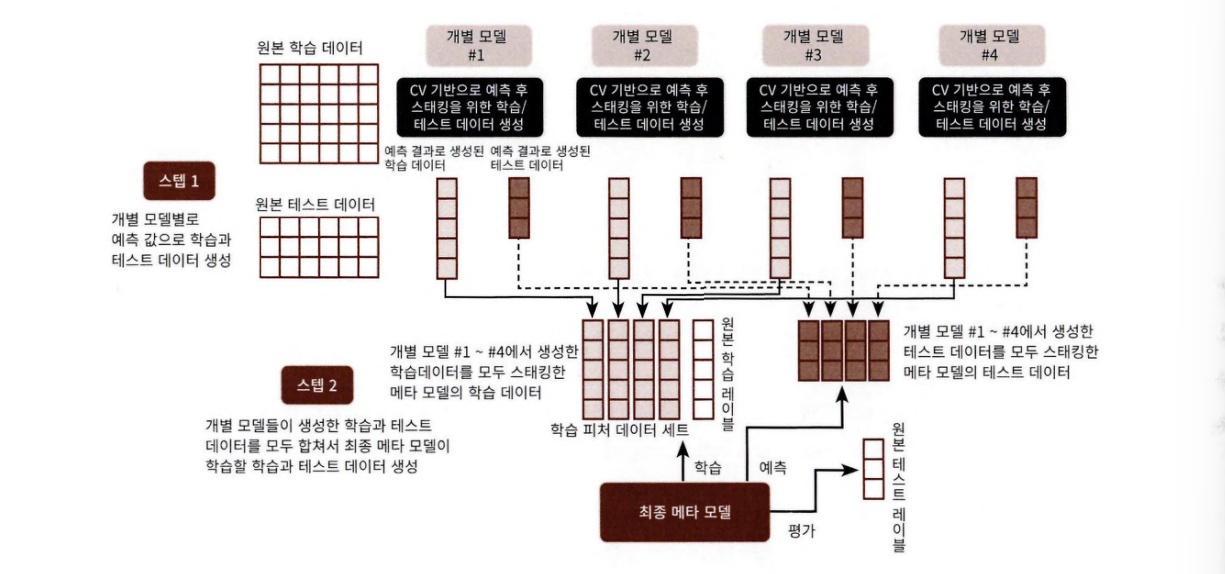

# **💻 실습 코드 필사**

#### 10. 분류 실습 - 캐글 신용카드 사기 검출 🔽

In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv("/content/drive/MyDrive/ESAA/과제/creditcard.csv")
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 반환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [4]:
# 사전 데이터 가공 수 학습과 테스트 데이터 세트를 반환
def get_train_test_dataset(df=None):
  df_copy = get_preprocessed_df(df)
  X_features = df_copy.iloc[:,:-1]
  y_target = df_copy.iloc[:,-1]
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [5]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [6]:
# get_clf_eval 함수
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [7]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85279    16]
 [   65    83]]
정확도: 0.9991, 정밀도: 0.8384, 재현율: 0.5608,    F1: 0.6721, AUC:0.9556


In [8]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:,1]
  get_clf_eval(tgt_test, pred, pred_proba)

In [9]:
# LightGBM 모델
from lightgbm import LGBMClassifier

# warnings.filterwarnings("ignore") > verbose = -1 설정!!

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False,verbose=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


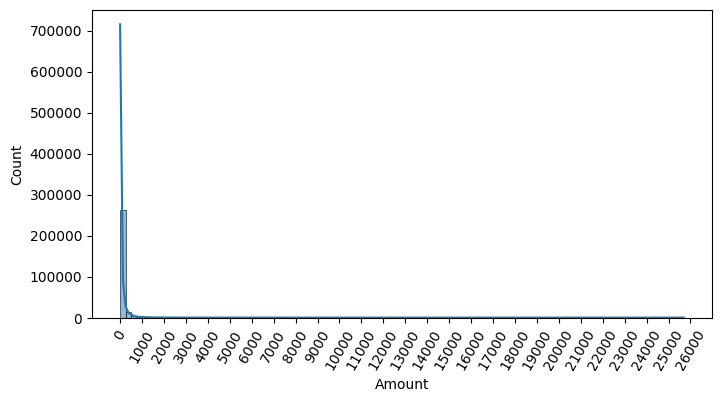

In [10]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.histplot(card_df['Amount'], bins =100, kde=True)
plt.show()

In [11]:
# Amount를 표준 정규 분포 형태로 변환 후 로지스틱 회귀(선형 모델) 예측, 평가
from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1)) # 정규화
  df_copy.drop('Time', axis=1, inplace=True)
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  return df_copy

In [12]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False,verbose=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8585, 재현율: 0.6149,    F1: 0.7165, AUC:0.9635
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9812


In [13]:
# StandardScaler 대신 로그 변환 수행: 데이터 분포도 왜곡 시 상당 수준 개선
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  # 넘파이의 log1p()를 이용해 Amount를 로그 변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time','Amount'], axis=1, inplace=True)
  return df_copy

In [14]:
# 피처 로그 변환 후 예측성능 확인
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측성능 ###
오차 행렬
[[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014,    F1: 0.7120, AUC:0.9734

### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


<Axes: >

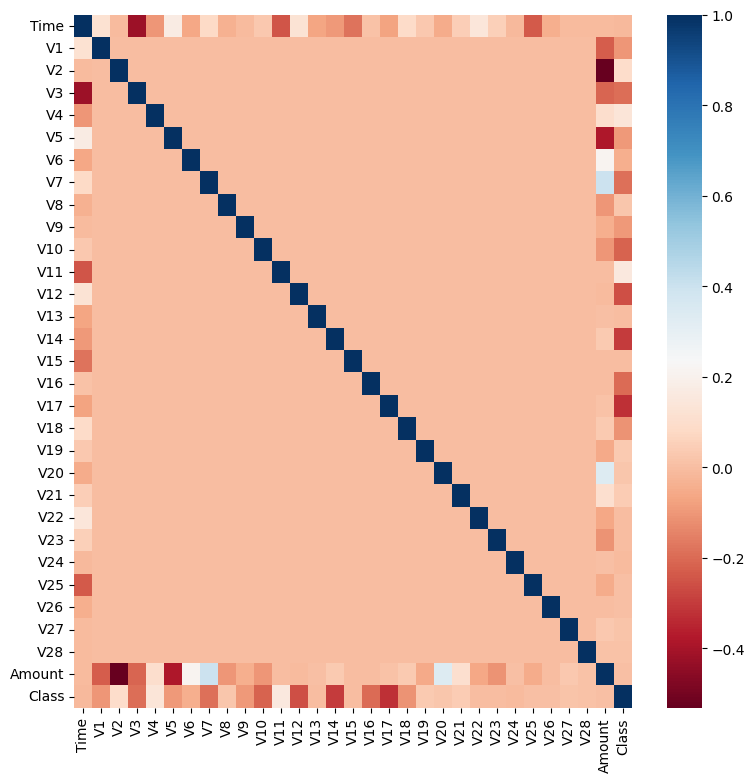

In [15]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [16]:
# 음의 상관관계가 높은 V14에 대해 이상치 제거

import numpy as np
def get_outlier(df=None, column=None, weight=1.5):
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight

  outlier_index =fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [17]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [18]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time','Amount'], axis=1, inplace=True)
  outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712,    F1: 0.7568, AUC:0.9725

### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


- 학습 데이터 세트에서만 오버 샘플링 해야 함

In [19]:
# smote의 fit_resample()로 증식
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


In [20]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test,
                     tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0541, 재현율: 0.9247,    F1: 0.1022, AUC:0.9736


In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

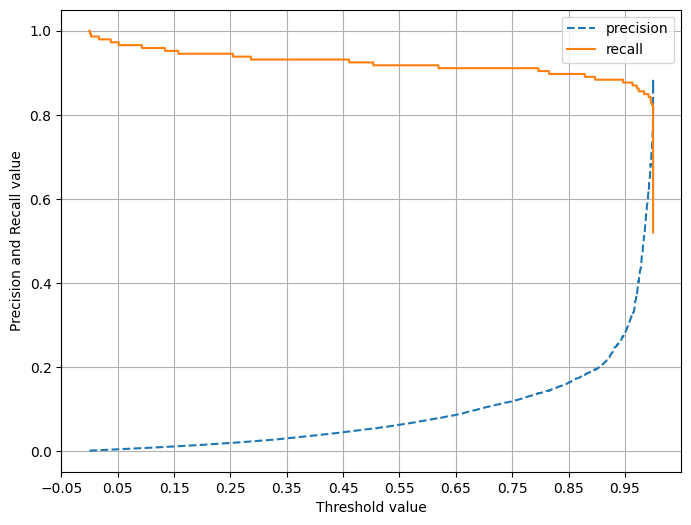

In [22]:
precision_recall_curve_plot(y_test=y_test, pred_proba_c1=lr_clf.predict_proba(X_test)[:,1])

In [23]:
# LightGBM 모델을 SMOTE로 오버 샘플링한 데이터 세트로 학습/예측/평가
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,    F1: 0.8794, AUC:0.9814


#### 11. 스태킹 앙상블 🔽

In [24]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [25]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

lr_final = LogisticRegression(C=10)

knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [26]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9649
랜덤 포레스트 정확도: 0.9123
결정 트리 정확도: 0.9737
에이다부스트 정확도: 0.9737


In [27]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [28]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도:0.9737


In [29]:
# 스텝 1
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  kf = KFold(n_splits=n_folds, shuffle = False)
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, 'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    print('\t 폴드 세트: ', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]
    model.fit(X_tr, y_tr)
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    test_pred[:, folder_counter] = model.predict(X_test_n)

  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
  return train_fold_pred, test_pred_mean

In [30]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작


In [31]:
# 스텝 2
# np.concatnate()로 여러 넘파이 배열 합치기
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [32]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도:0.9649
